In [1]:
!pip install transformers langchain faiss-gpu sentence_transformers --quiet

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM


model_name = "cerebras/Cerebras-GPT-13B"
cache_dir = "/home/ec2-user/SageMaker/tmp"
tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir=cache_dir)
model = AutoModelForCausalLM.from_pretrained(model_name, cache_dir=cache_dir)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
# ラベル
labels = [
  "後藤ひとり",
  "伊地知虹夏",
  "山田リョウ",
  "喜多郁代",
  "ギターヒーローの正体は？",
]

# データ
data = [
  "秀華高校に通う女子。桃色の髪を無造作に伸ばし、いつもジャージを身につけている。...",
  "下北沢高校に通う女子。後藤ひとりより1学年上。ライトイエロー色の髪をサイドテールにセットし、派手目のファッションを好んで着ている。...",
  "下北沢高校に通う女子。後藤ひとりより1学年上。中性的な雰囲気を漂わせた麗人で、青色の髪をボブにセットしている。...",
  "秀華高校に通う女子。後藤ひとりとは同学年。ウェーブの入った赤い髪をセミロングに伸ばした美少女で、社交的な性格をしている。...",
  "ギターヒーローの正体は？",
]

In [4]:
from langchain.embeddings import HuggingFaceEmbeddings

# ・embed_query() : 単一のテキストを埋め込みに変換。
# ・embed_documents() : 複数のテキストを埋め込みに変換。

# HuggingFaceによる埋め込み生成
embeddings = HuggingFaceEmbeddings()
vectors = embeddings.embed_documents(data)

In [5]:
import io

# ファイルに保存
out_v = io.open("vectors.tsv", "w", encoding="utf-8")
out_m = io.open("metadata.tsv", "w", encoding="utf-8")
for index, label in enumerate(labels):
    vector = vectors[index]
    out_v.write("\t".join([str(x) for x in vector]) + "\n")
    out_m.write(label + "\n")
out_v.close()
out_m.close()

In [ ]:
# open https://projector.tensorflow.org/

In [6]:
labels = [
 "リンゴ",
 "梨",
 "桃",
 "犬",
 "猫",
 "ウサギ",
 "Apple",
 "Pear",
 "Peach",
 "Dog",
 "Cat",
 "Rabbit",
]

data = [
  "バラ科リンゴ属の落葉高木、またはその果実のこと。...",
  "バラ科ナシ属の植物、もしくは果物として食用にされるその果実のこと。主なものとして、...",
  "バラ科スモモ属の落葉小高木。また、その果実や花のこと。...",
  "食肉目・イヌ科・イヌ属に分類される哺乳類の一種である。 ...",
  "狭義には食肉目ネコ科ネコ属に分類されるリビアヤマネコ（ヨーロッパヤマネコ）が...",
  "最も広義には兎形目、狭義にはウサギ科、さらに狭義にはウサギ亜科もしくはノウサギ亜科...",
  "A deciduous tall tree belonging to the genus Malus of the Rosaceae family,...",
  "A plant belonging to the genus Pear of the family Rosaceae, ...",
  "A deciduous small tree of the Rosaceae family Plum. ...",
  "It is a mammal classified under the order Carnivora, ...",
  "In a narrow sense, the Libyan wildcat (European wildcat), ...",
  "A general term for the Lagomorpha in the broadest sense, ...",
]

In [7]:
vectors2 = embeddings.embed_documents(data)

import io

# ファイルに保存
out_v = io.open("vectors2.tsv", "w", encoding="utf-8")
out_m = io.open("metadata2.tsv", "w", encoding="utf-8")
for index, label in enumerate(labels):
    vector = vectors2[index]
    out_v.write("\t".join([str(x) for x in vector]) + "\n")
    out_m.write(label + "\n")
out_v.close()
out_m.close()

In [8]:
from PIL import Image

img = Image.open('img.png')

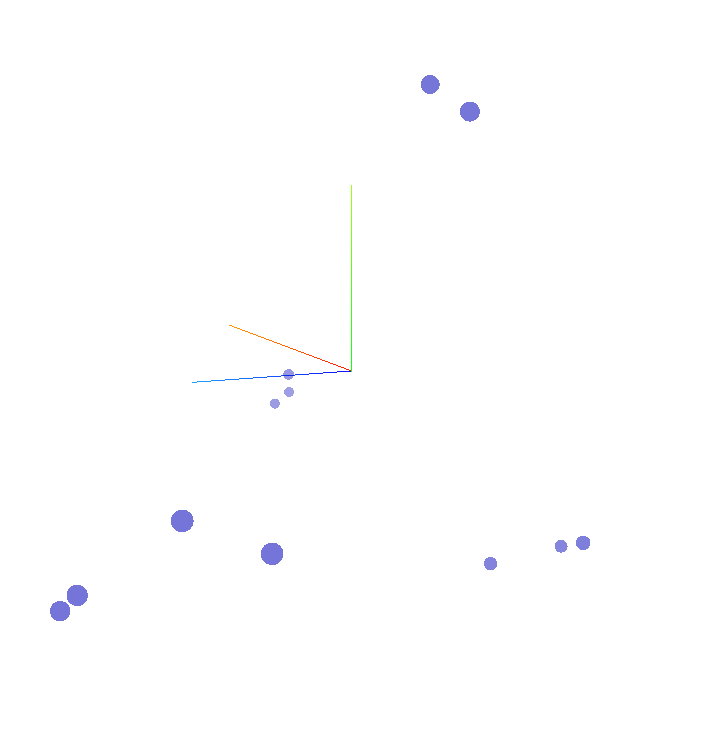

In [9]:
img